## Rips kompleks

In [366]:
import gudhi
import pandas as pd
import numpy as np

%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

In [367]:
# Ucitavanje koordinata modela
# Ukoliko ima problema sa ovim, to je verovatno zbog toga što postoji dodatak prazan red u trećem redu fajlu.
# Ako je to slucaj, najlakse je napraviti male izmene na fajlu, tako da je on u formatu:
# OFF
# num_vertices num_egdes 0
# x1 y1 z1
# ...
def read_off(path):
    with open(path, "r") as file:
        file.readline()
        n_verts, n_faces, _ = tuple([int(s) for s in file.readline().strip().split(' ')])
        verts = [[float(s) for s in file.readline().strip().split(' ')] for i_vert in range(n_verts)]
        return verts
    
points = read_off("data/models/anchor.off")
points = np.array(points)

In [361]:
# Ucitavanje matrice geodezijskih rastojanja
distances = pd.read_csv("data/distance_matricies/anchor.csv", header=None, delimiter=',', lineterminator='\n')
distances.shape

(519, 519)

In [362]:
rips = gudhi.RipsComplex(distance_matrix=distances.values,
                                  max_edge_length=0.2) 

In [363]:
st = rips.create_simplex_tree(max_dimension=2)

In [364]:
print(st.num_vertices())
print(st.num_simplices())

519
362112


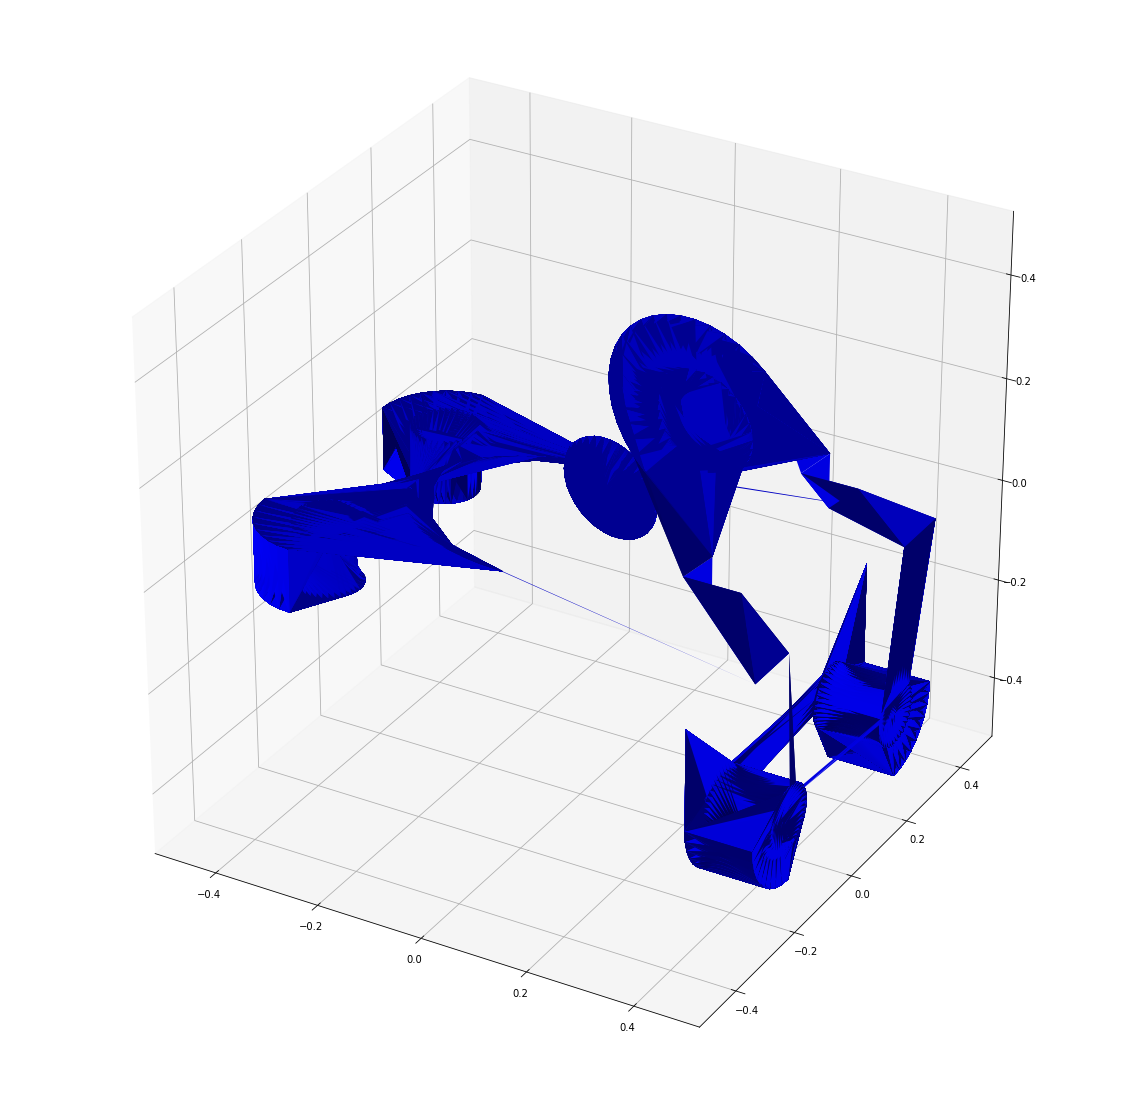

In [365]:
L = st.get_filtration()

triangles = np.array([s[0] for s in L if len(s[0])==3])

fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
l = ax.plot_trisurf(points[:,0], points[:,1], points[:,2], triangles=triangles, color="blue")
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(-0.5, 0.5)

plt.show()

### Pruning above 0.1

In [355]:
L = st.get_filtration()
# for simplex in L:
#     print(simplex)

In [356]:
st.prune_above_filtration(0.1)
L1 = st.get_filtration()
# for simplex in L1:
#     print(simplex)

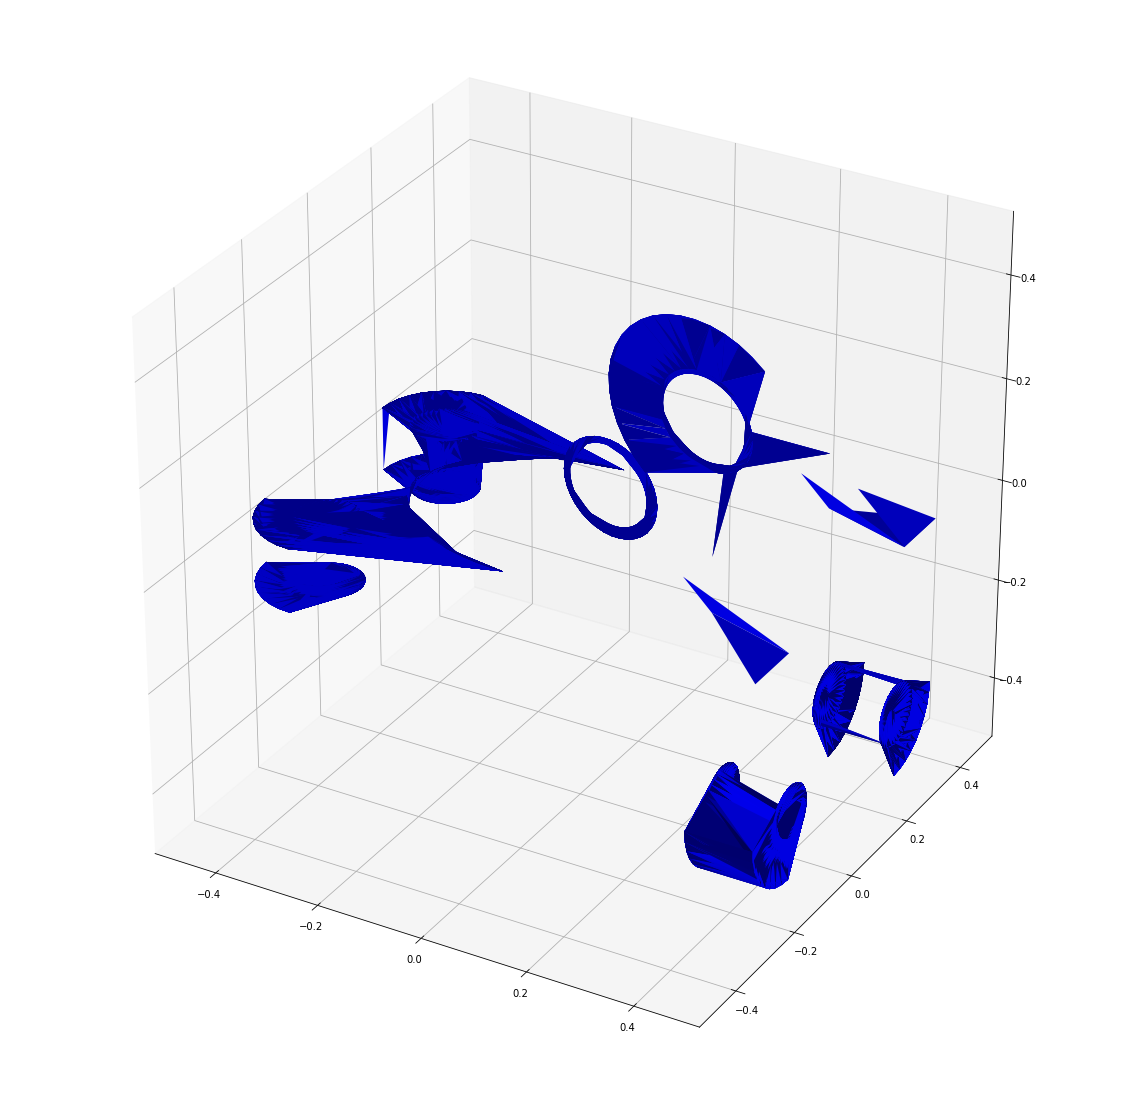

In [357]:
triangles = np.array([s[0] for s in L1 if len(s[0])==3])

fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
l = ax.plot_trisurf(points[:,0], points[:,1], points[:,2], triangles=triangles, color="blue")
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(-0.5, 0.5)

plt.show()

### Prune above 0.07

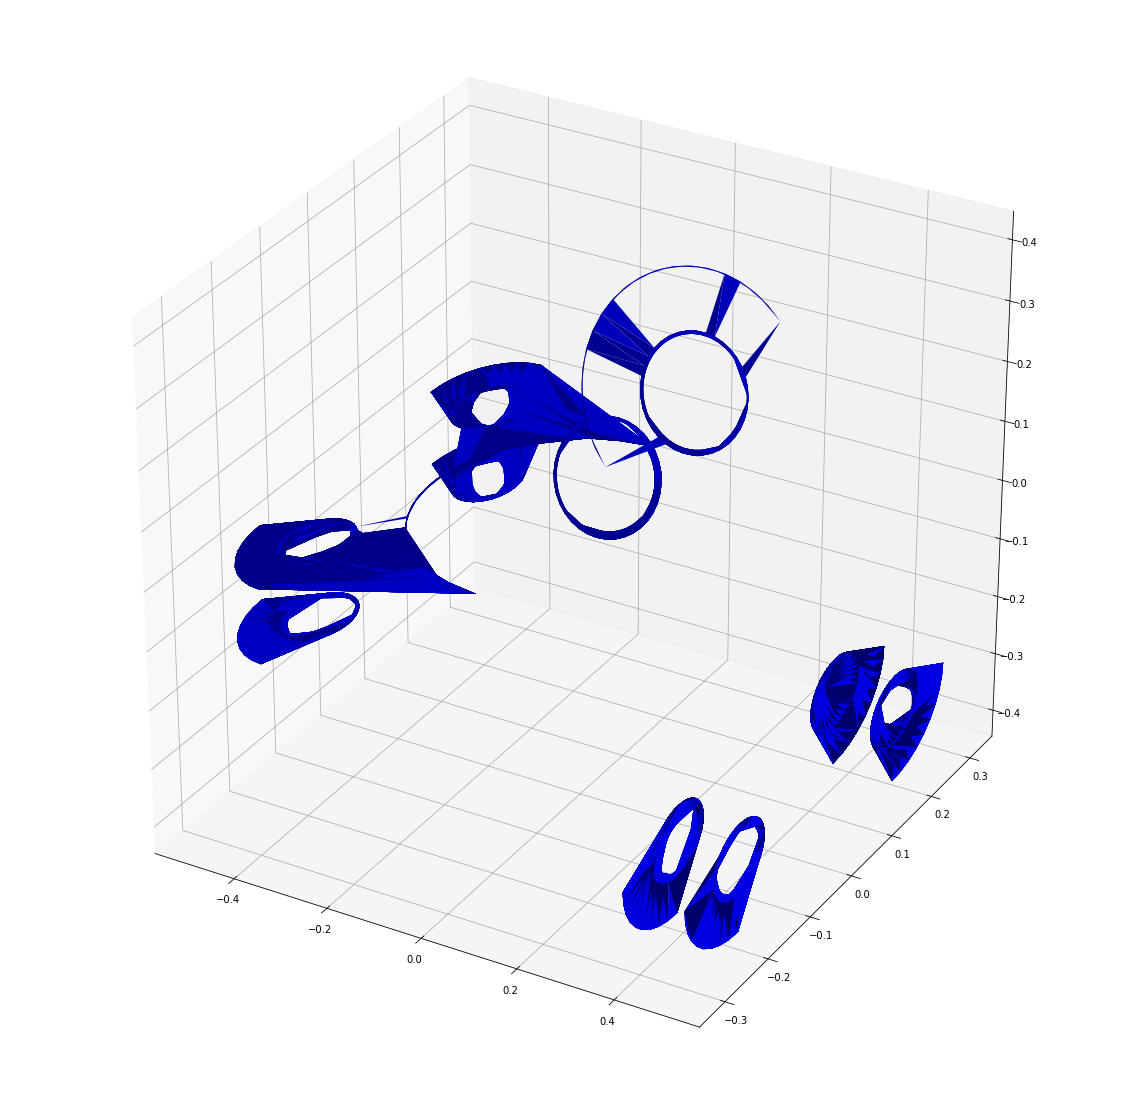

In [318]:
st.prune_above_filtration(0.07)
L1 = st.get_filtration()

triangles = np.array([s[0] for s in L1 if len(s[0])==3])

fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
l = ax.plot_trisurf(points[:,0], points[:,1], points[:,2], triangles=triangles, color="blue")
# ax.set_xlim(-1.1, 1.1)
# ax.set_ylim(-1.1, 1.1)
# ax.set_zlim(-1.1, 1.1)

plt.show()

### Prune above 0.05

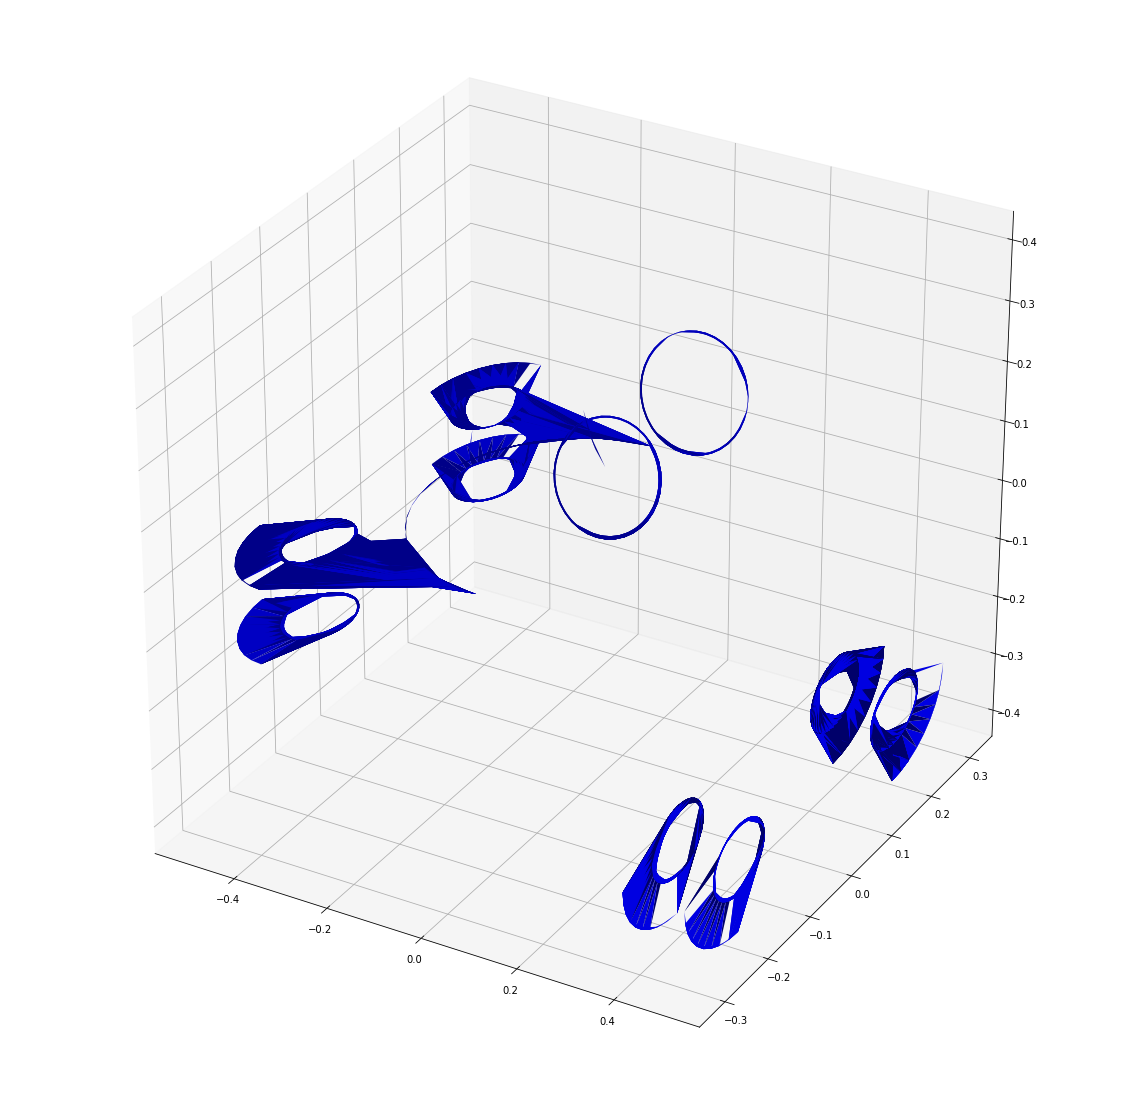

In [319]:
st.prune_above_filtration(0.05)
L1 = st.get_filtration()

triangles = np.array([s[0] for s in L1 if len(s[0])==3])

fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
l = ax.plot_trisurf(points[:,0], points[:,1], points[:,2], triangles=triangles, color="blue")
# ax.set_xlim(-1.1, 1.1)
# ax.set_ylim(-1.1, 1.1)
# ax.set_zlim(-1.1, 1.1)

plt.show()

In [320]:
### Prune above 0.03

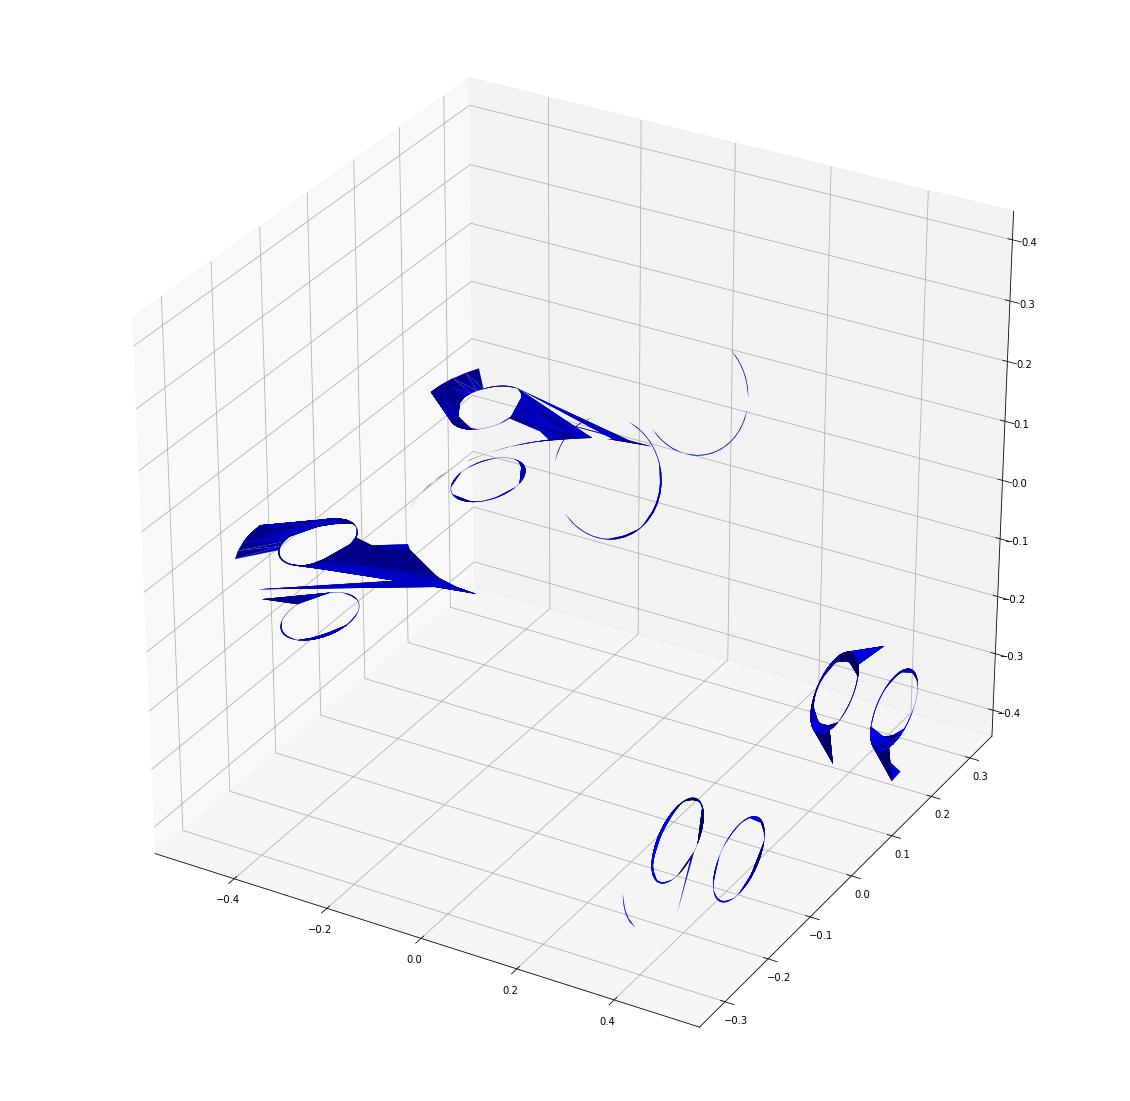

In [321]:
st.prune_above_filtration(0.03)
L1 = st.get_filtration()

triangles = np.array([s[0] for s in L1 if len(s[0])==3])

fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
l = ax.plot_trisurf(points[:,0], points[:,1], points[:,2], triangles=triangles, color="blue")
# ax.set_xlim(-1.1, 1.1)
# ax.set_ylim(-1.1, 1.1)
# ax.set_zlim(-1.1, 1.1)

plt.show()